   # Stock Prediction LSTM

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
# reading from yahoo finance
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr


In [4]:
yf.pdr_override()

In [5]:
from datetime import datetime
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)
print('Start date: ', start)
print('End date: ', end)

Start date:  2022-10-25 00:00:00
End date:  2023-10-25 19:08:36.147353


In [6]:
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

In [8]:
print(type(AAPL))
print(AAPL.shape)
AAPL

<class 'pandas.core.frame.DataFrame'>
(252, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-25,150.089996,152.490005,149.360001,152.339996,151.441589,74732300
2022-10-26,150.960007,151.990005,148.039993,149.350006,148.469223,88194300
2022-10-27,148.070007,149.050003,144.130005,144.800003,143.946060,109180200
2022-10-28,148.199997,157.500000,147.820007,155.740005,154.821548,164762400
2022-10-31,153.160004,154.240005,151.919998,153.339996,152.435684,97943200
...,...,...,...,...,...,...
2023-10-19,176.039993,177.839996,175.190002,175.460007,175.460007,59302900
2023-10-20,175.309998,175.419998,172.639999,172.880005,172.880005,64189300
2023-10-23,170.910004,174.009995,169.929993,173.000000,173.000000,55980100


In [9]:
for company, company_name in zip(company_list, company_name):
    company["company_name"] = company_name

In [10]:
company

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-10-25,119.650002,121.320000,118.949997,120.599998,120.599998,50934600,AMAZON
2022-10-26,116.000000,119.349998,114.760002,115.660004,115.660004,68802300,AMAZON
2022-10-27,113.919998,114.120003,109.769997,110.959999,110.959999,129605400,AMAZON
2022-10-28,97.910004,103.959999,97.660004,103.410004,103.410004,223133400,AMAZON
2022-10-31,103.559998,104.870003,100.739998,102.440002,102.440002,99251400,AMAZON
...,...,...,...,...,...,...,...
2023-10-19,130.570007,132.240005,127.470001,128.399994,128.399994,60961400,AMAZON
2023-10-20,128.050003,128.169998,124.970001,125.169998,125.169998,56343300,AMAZON
2023-10-23,124.629997,127.879997,123.980003,126.559998,126.559998,48260000,AMAZON


In [11]:
dataset = pd.concat(company_list, axis=0) # concatenate all companies rows

In [12]:
dataset

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-10-25,150.089996,152.490005,149.360001,152.339996,151.441589,74732300,APPLE
2022-10-26,150.960007,151.990005,148.039993,149.350006,148.469223,88194300,APPLE
2022-10-27,148.070007,149.050003,144.130005,144.800003,143.946060,109180200,APPLE
2022-10-28,148.199997,157.500000,147.820007,155.740005,154.821548,164762400,APPLE
2022-10-31,153.160004,154.240005,151.919998,153.339996,152.435684,97943200,APPLE
...,...,...,...,...,...,...,...
2023-10-19,130.570007,132.240005,127.470001,128.399994,128.399994,60961400,AMAZON
2023-10-20,128.050003,128.169998,124.970001,125.169998,125.169998,56343300,AMAZON
2023-10-23,124.629997,127.879997,123.980003,126.559998,126.559998,48260000,AMAZON


In [13]:
dataset.shape

(1008, 7)

## Descriptive Statistics about the data

In [14]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1008.000000,1008.000000,1008.000000,1008.000000,1008.000000,1.008000e+03
mean,169.622833,171.583433,167.813837,169.747240,169.404270,4.633779e+07
std,77.353115,77.987355,76.737772,77.370338,77.060230,2.664341e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,8.567800e+06
25%,106.575001,108.236250,105.309999,106.740000,106.740000,2.453585e+07
50%,138.570000,139.739998,136.940002,138.395004,138.264999,4.274050e+07
75%,201.567505,203.774998,199.817497,200.899998,200.188801,5.999932e+07
max,361.750000,366.779999,352.440002,359.489990,358.730469,2.231334e+08


In [15]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,164.065715,165.761905,162.553929,164.225912,163.871244,6.480488e+07
std,18.664761,18.484076,18.895875,18.669800,18.843043,2.122862e+07
min,126.010002,127.769997,124.169998,125.019997,124.488869,3.145820e+07
25%,148.285000,150.407497,147.277496,148.717495,148.142136,5.034570e+07
50%,166.095001,168.014999,165.549995,167.049995,166.594284,5.917030e+07
75%,178.237499,179.917503,177.070004,178.445000,178.444702,7.365502e+07
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.647624e+08


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2022-10-25 to 2023-10-25
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1008 non-null   float64
 1   High          1008 non-null   float64
 2   Low           1008 non-null   float64
 3   Close         1008 non-null   float64
 4   Adj Close     1008 non-null   float64
 5   Volume        1008 non-null   int64  
 6   company_name  1008 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 63.0+ KB


In [17]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-10-25 to 2023-10-25
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


## Closing price

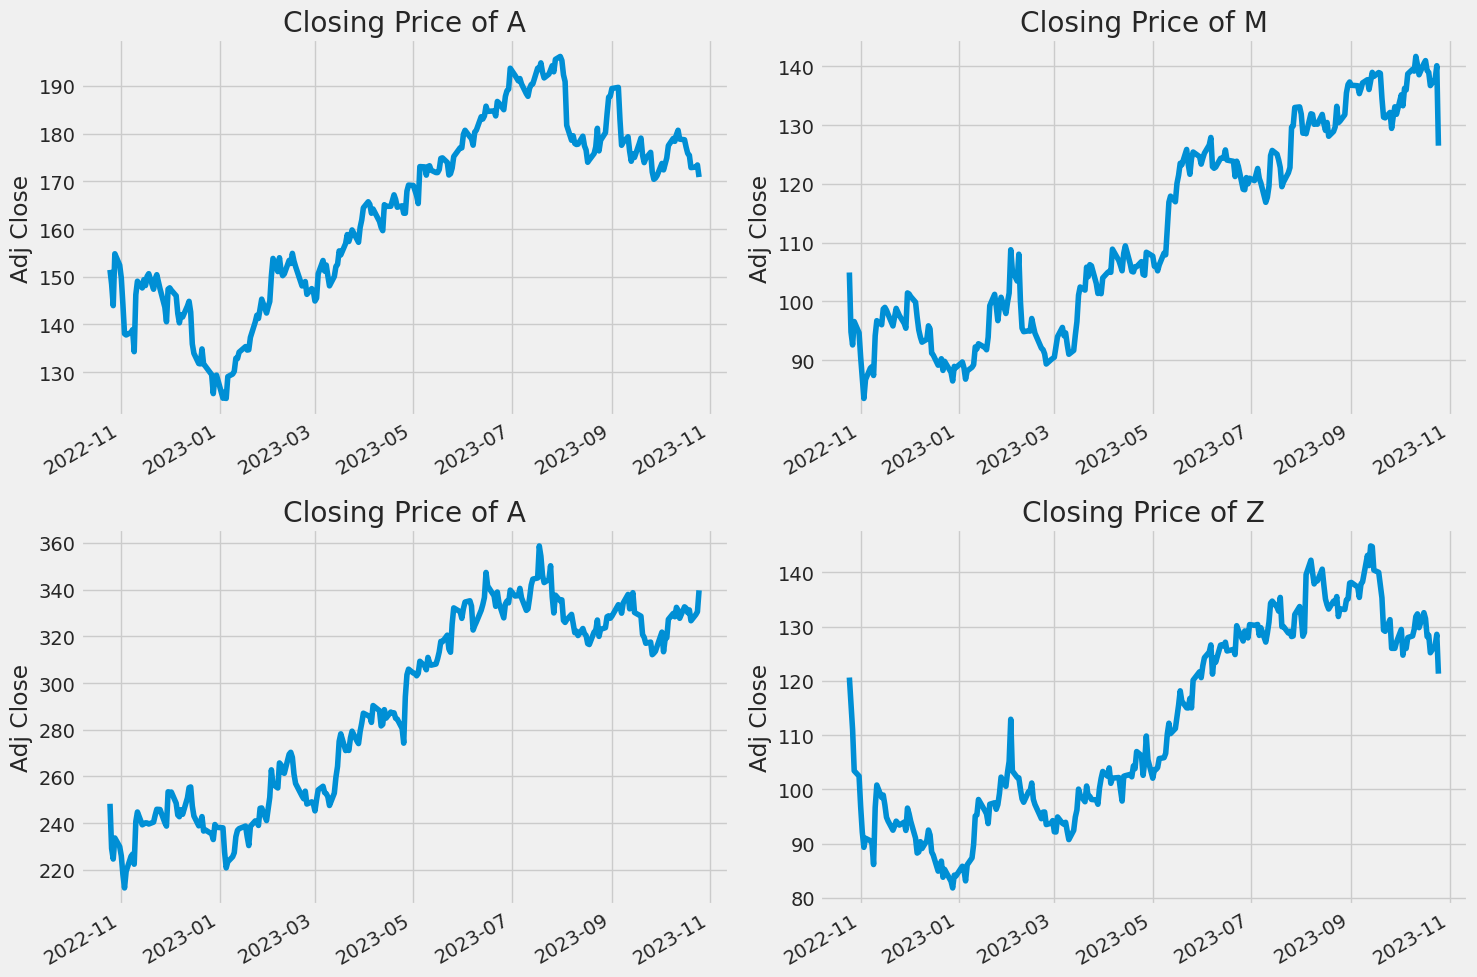

In [18]:
fig, axes = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)

for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f'Closing Price of {company_name[i-1]}')

plt.tight_layout()

## Volume of sales

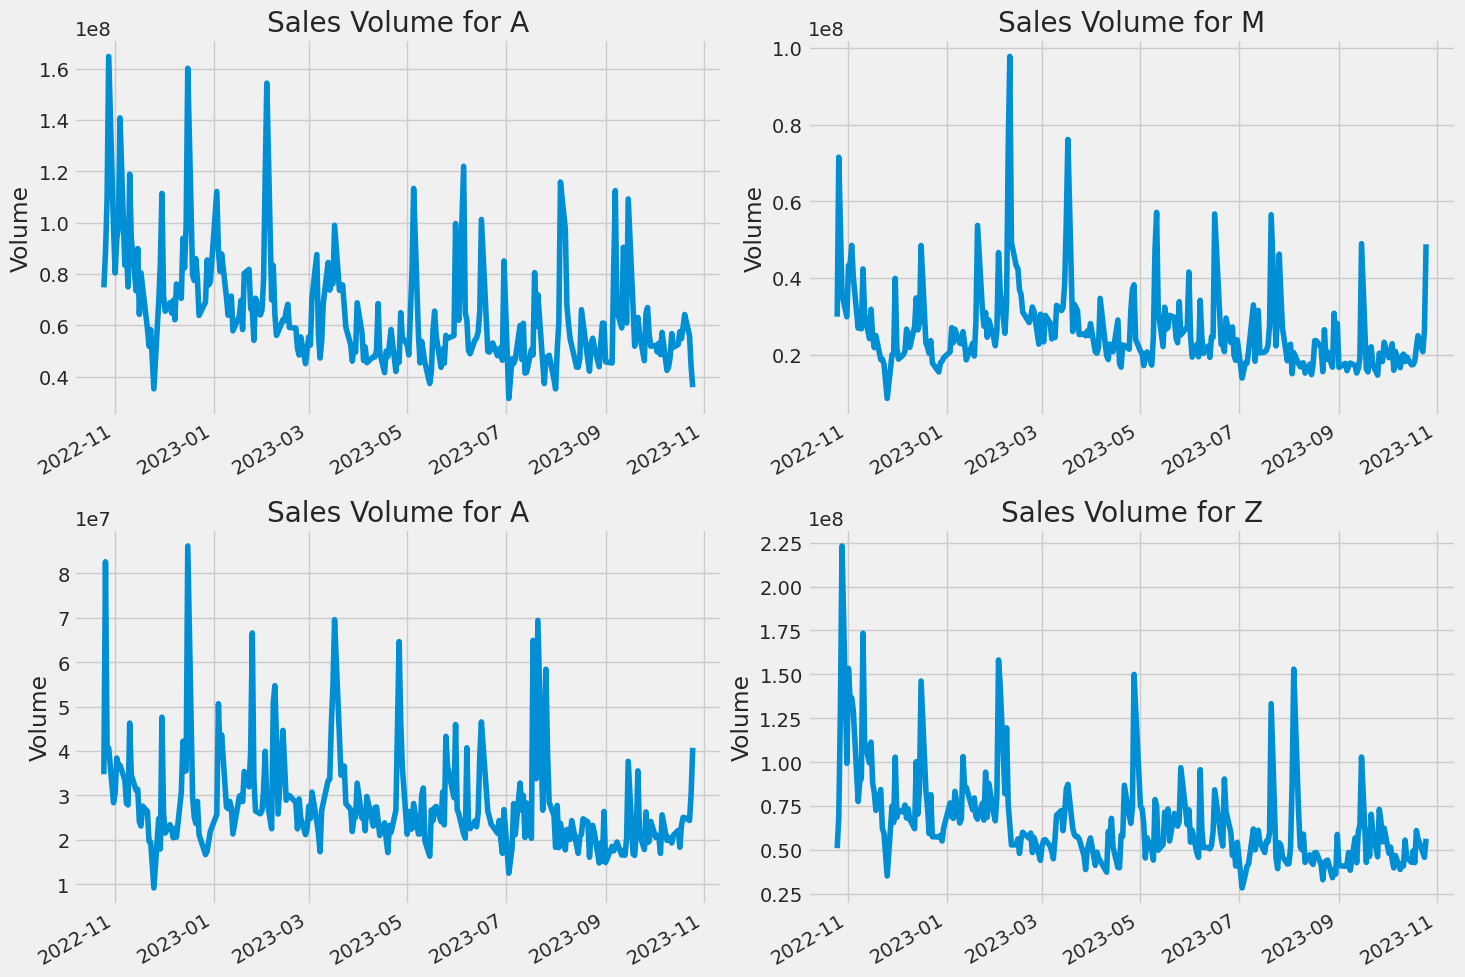

In [19]:
fig, axes = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f'Sales Volume for {company_name[i-1]}')
plt.tight_layout()

## Moving Average

In [20]:
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in company_list:
        column_name = f'MA for {ma} days'
        company[column_name] = company['Adj Close'].rolling(ma).mean()

Text(0.5, 1.0, 'Amazon')

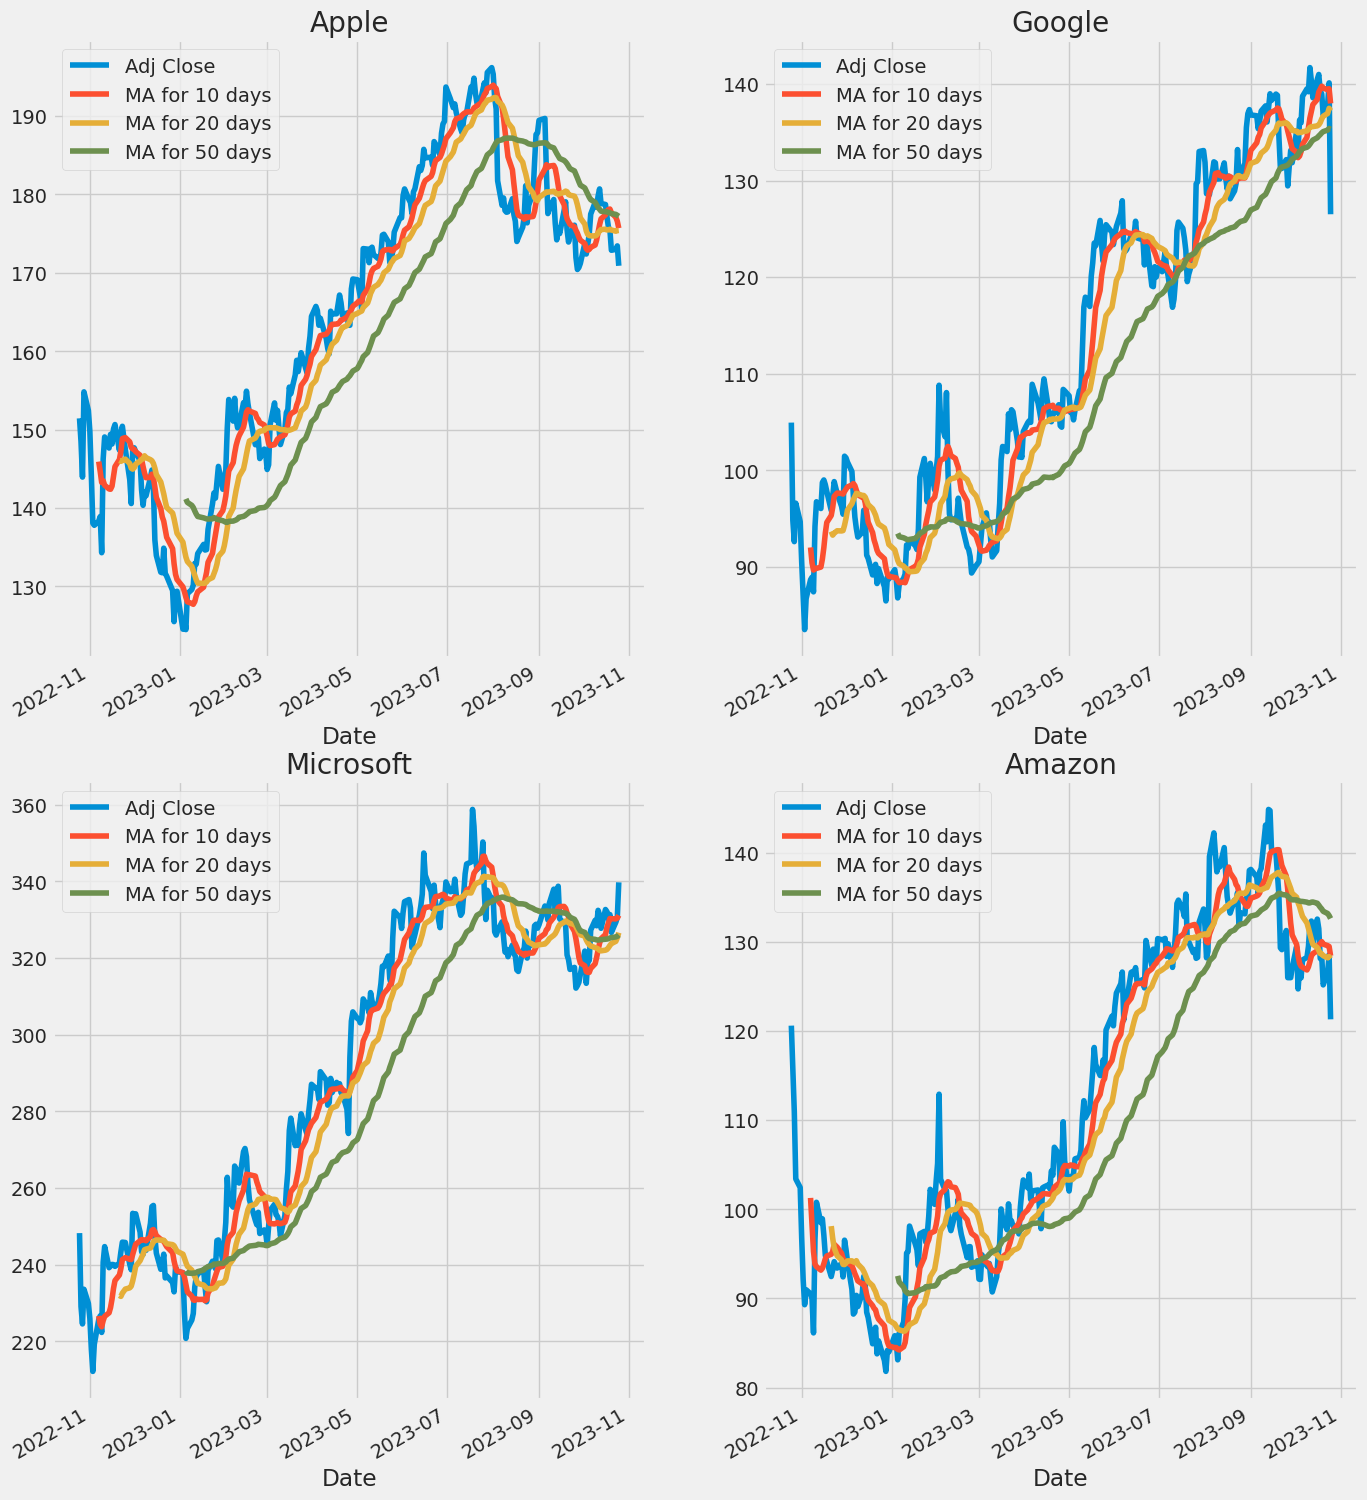

In [21]:
fig, axes = plt.subplots(2,2)
fig.set_figheight(20)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[0,0])
axes[0,0].set_title('Apple')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[0,1])
axes[0,1].set_title('Google')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[1,0])
axes[1,0].set_title('Microsoft')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax = axes[1,1])
axes[1,1].set_title('Amazon')

## Daily Return

In [22]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

Text(0.5, 1.0, 'Amazon')

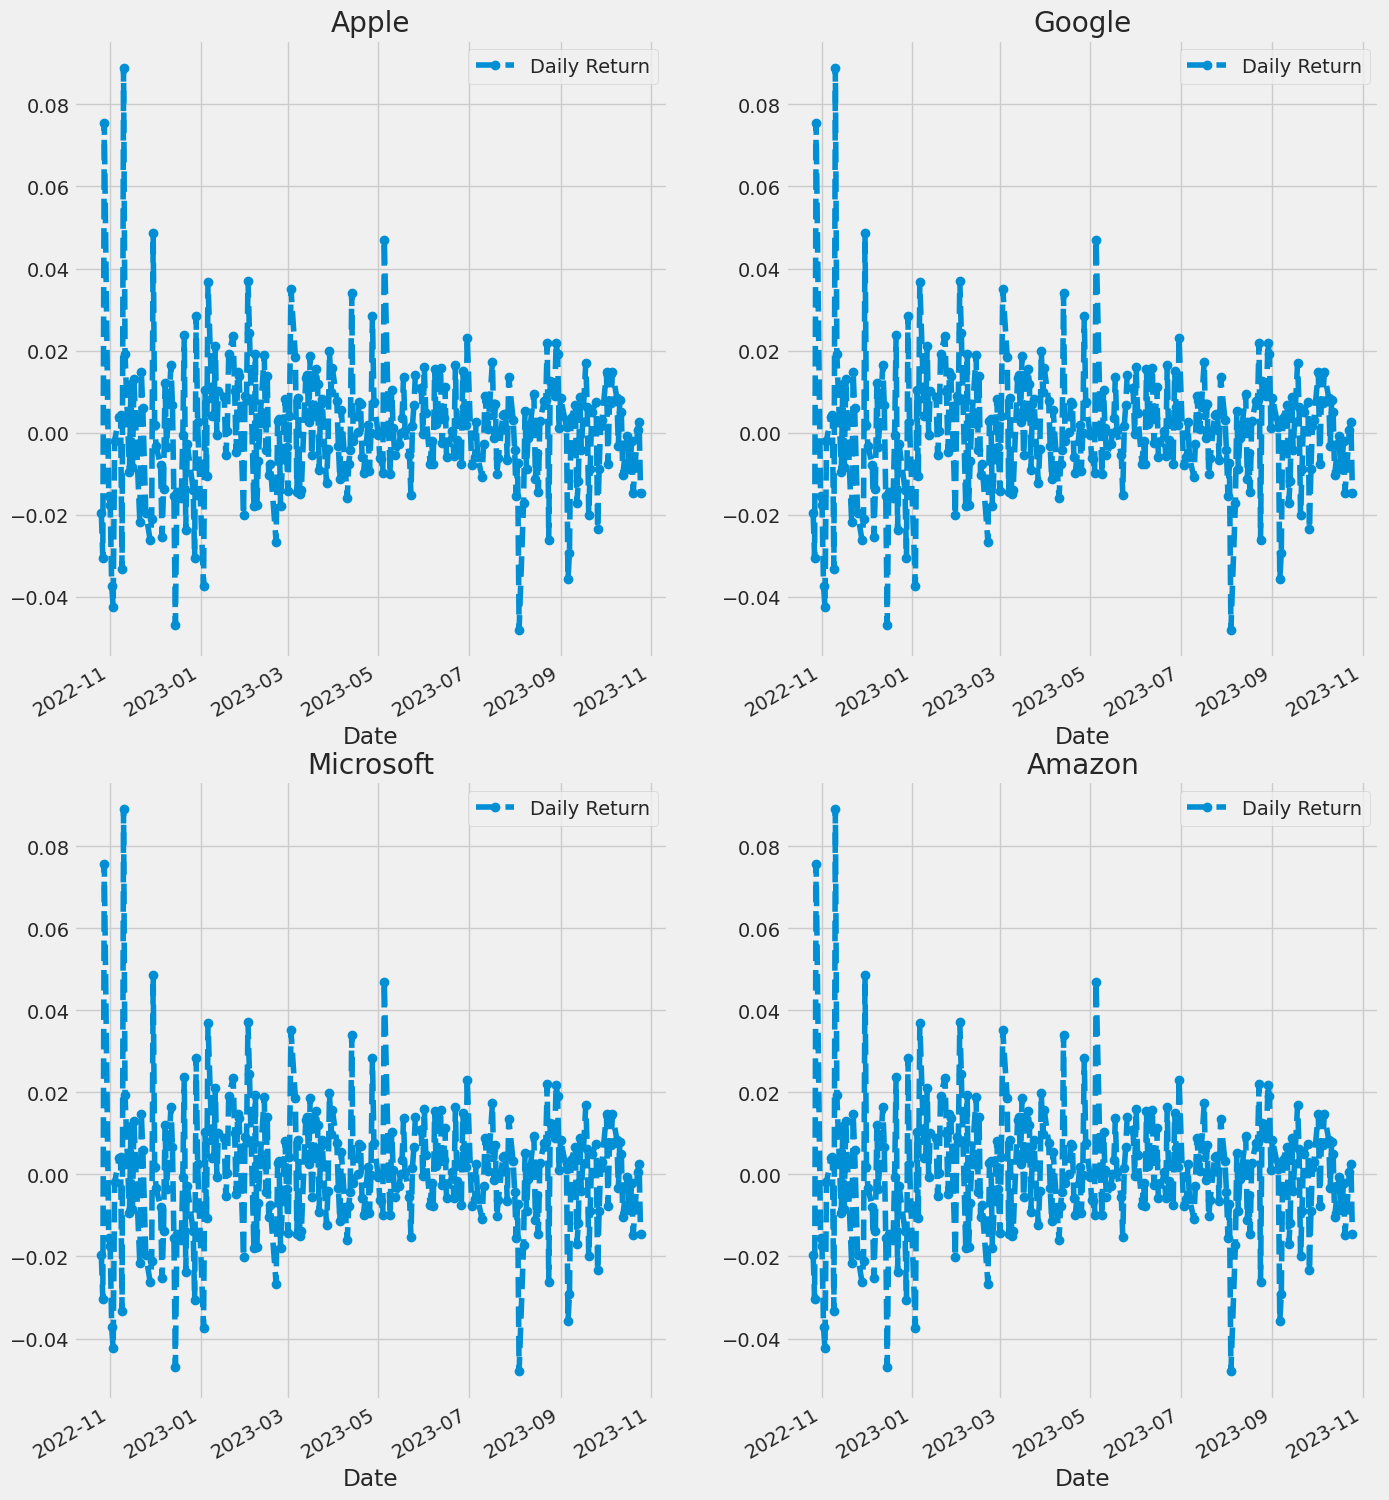

In [23]:
fig, axes = plt.subplots(2,2)
fig.set_figheight(20)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend = True, linestyle = '--', marker = 'o')
axes[0,0].set_title('Apple')

AAPL['Daily Return'].plot(ax=axes[0,1], legend = True, linestyle = '--', marker = 'o')
axes[0,1].set_title('Google')

AAPL['Daily Return'].plot(ax=axes[1,0], legend = True, linestyle = '--', marker = 'o')
axes[1,0].set_title('Microsoft')

AAPL['Daily Return'].plot(ax=axes[1,1], legend = True, linestyle = '--', marker = 'o')
axes[1,1].set_title('Amazon')

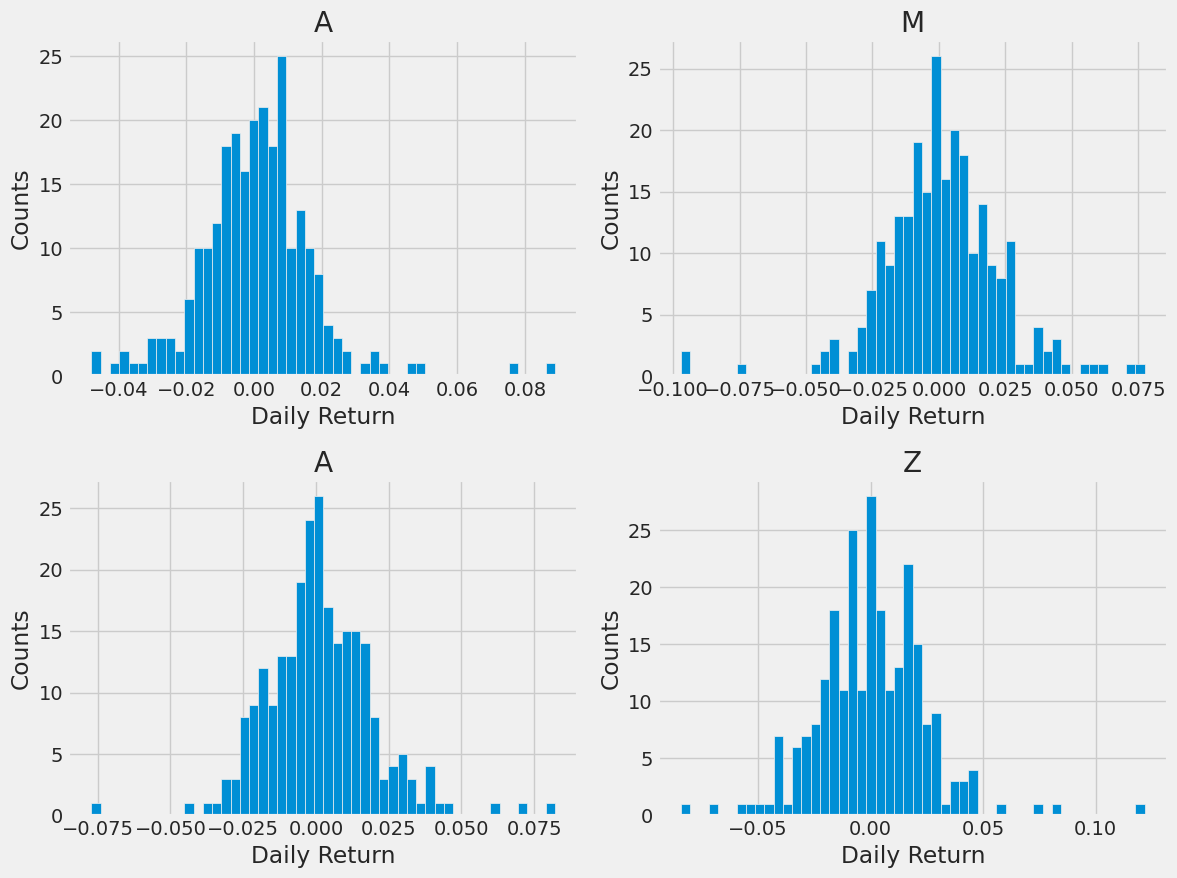

In [24]:
plt.figure(figsize=(12,9))
for i, company in enumerate(company_list, 1):
    plt.subplot(2,2,i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i-1]}')

plt.tight_layout()

In [25]:
closing_df = pdr.get_data_yahoo(tech_list, start = start, end = end)['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [26]:
closing_df

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-10-25,151.441589,120.599998,104.930000,248.261597
2022-10-26,148.469223,115.660004,94.820000,229.106644
2022-10-27,143.946060,110.959999,92.599998,224.580368
2022-10-28,154.821564,103.410004,96.580002,233.613098
2022-10-31,152.435684,102.440002,94.660004,229.908890
...,...,...,...,...
2023-10-19,175.460007,128.399994,138.979996,331.320007
2023-10-20,172.880005,125.169998,136.740005,326.670013
2023-10-23,173.000000,126.559998,137.899994,329.320007


In [27]:
tech_rets = closing_df.pct_change()
tech_rets

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-10-25,NaN,NaN,NaN,NaN
2022-10-26,-0.019627,-0.040962,-0.096350,-0.077156
2022-10-27,-0.030465,-0.040636,-0.023413,-0.019756
2022-10-28,0.075553,-0.068042,0.042981,0.040220
2022-10-31,-0.015411,-0.009380,-0.019880,-0.015856
...,...,...,...,...
2023-10-19,-0.002161,0.002107,-0.002154,0.003666
2023-10-20,-0.014704,-0.025156,-0.016117,-0.014035
2023-10-23,0.000694,0.011105,0.008483,0.008112


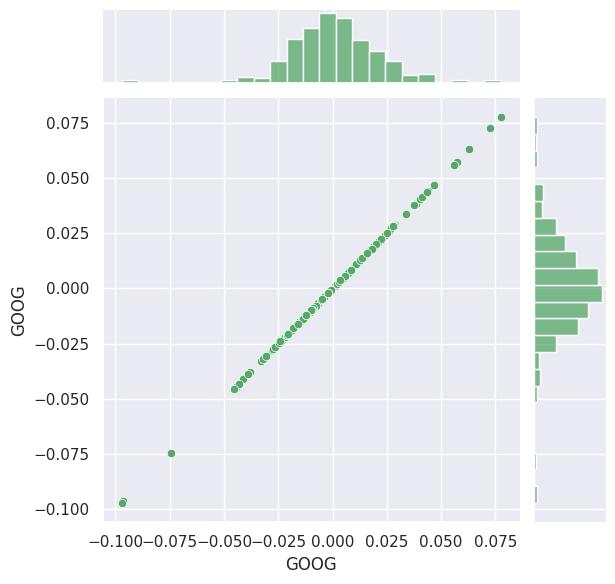

In [28]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color = 'g')

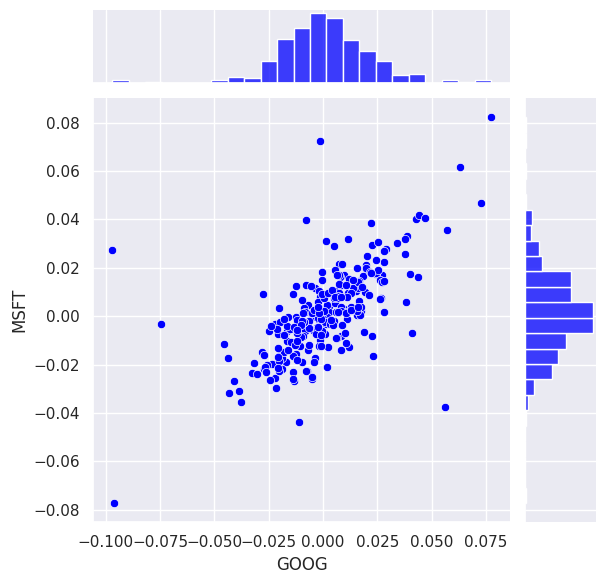

In [29]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter', color = 'blue')

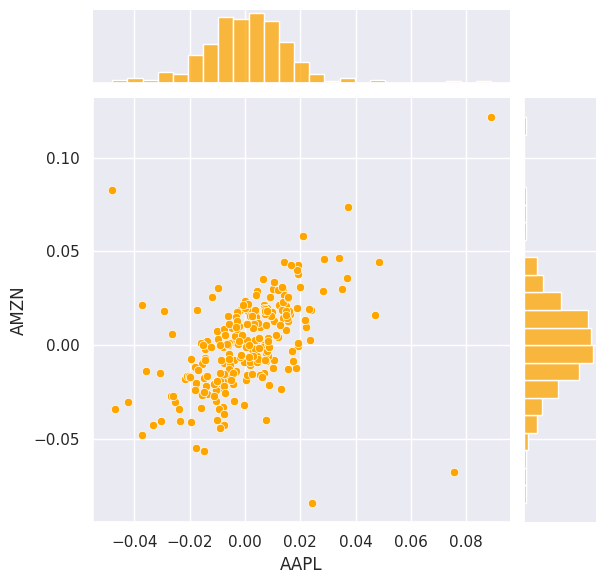

In [30]:
sns.jointplot(x='AAPL', y='AMZN', data=tech_rets, kind='scatter', color = 'orange')

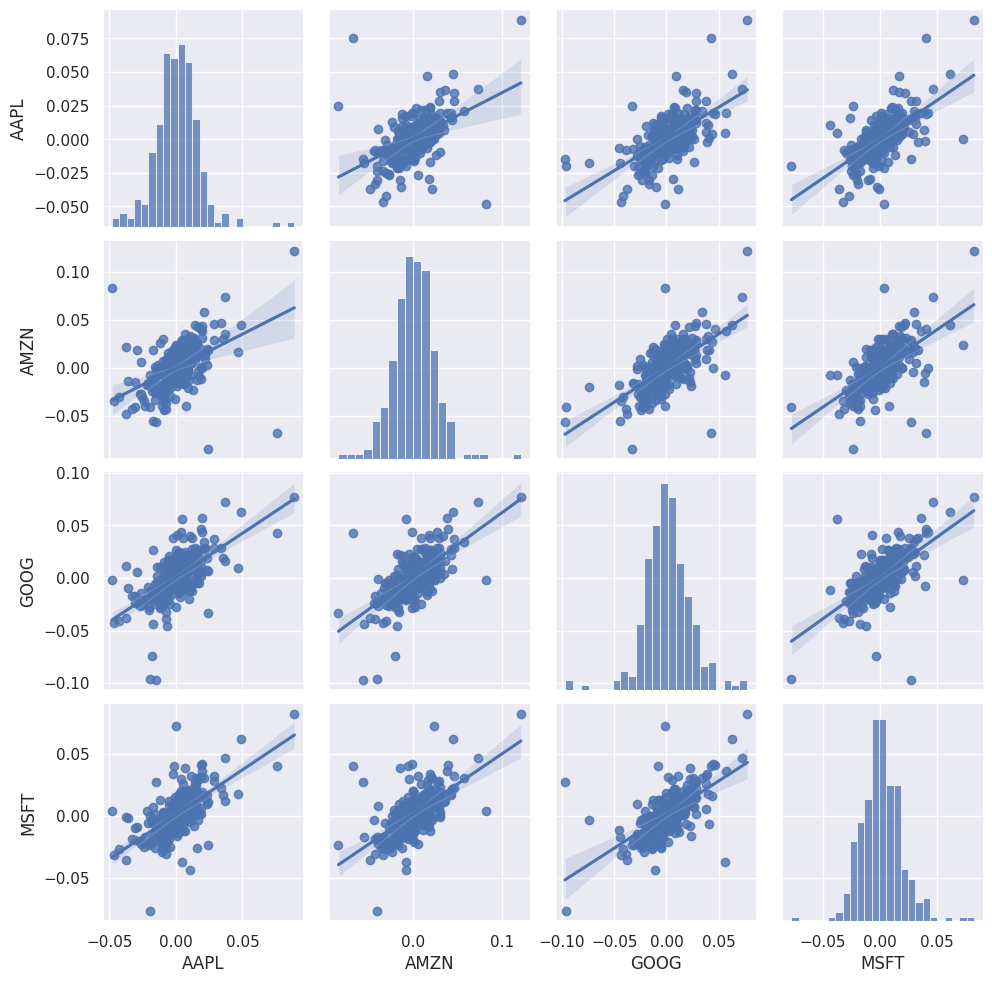

In [31]:
sns.pairplot(tech_rets, kind = 'reg')

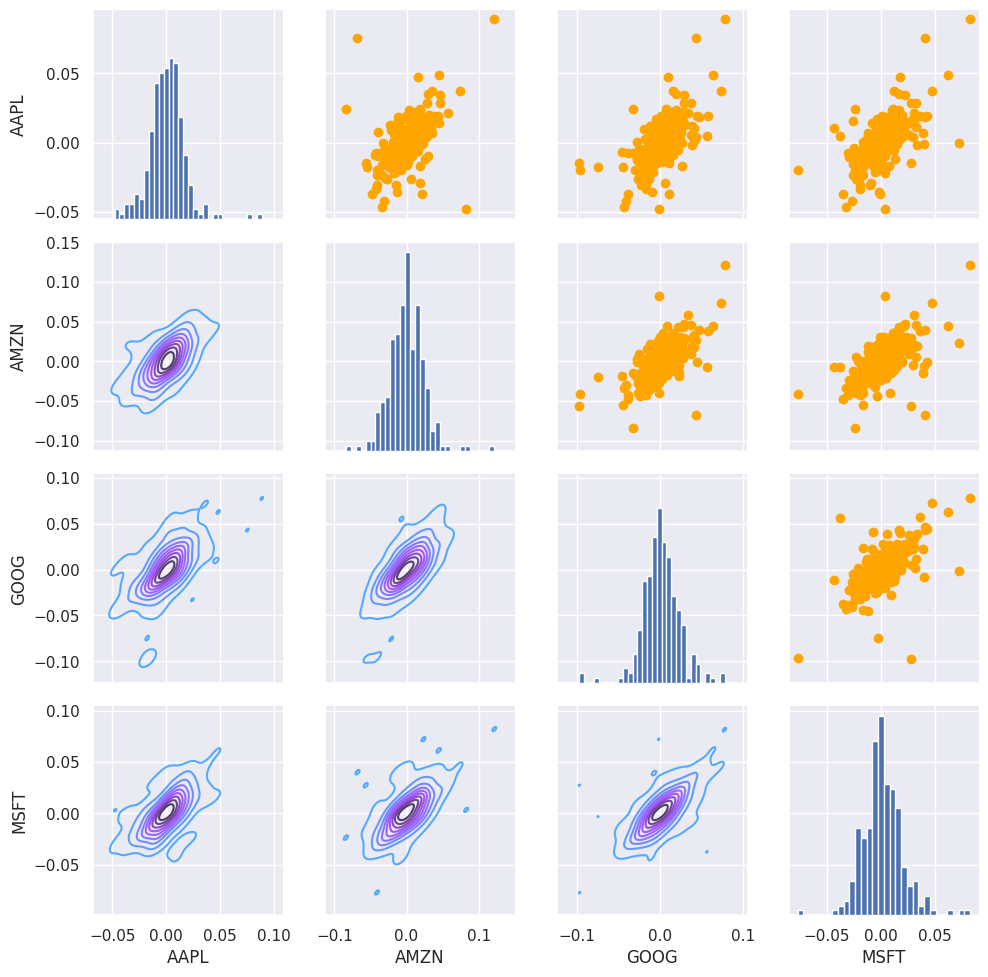

In [32]:
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color = 'orange')
return_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
return_fig.map_diag(plt.hist, bins = 30)

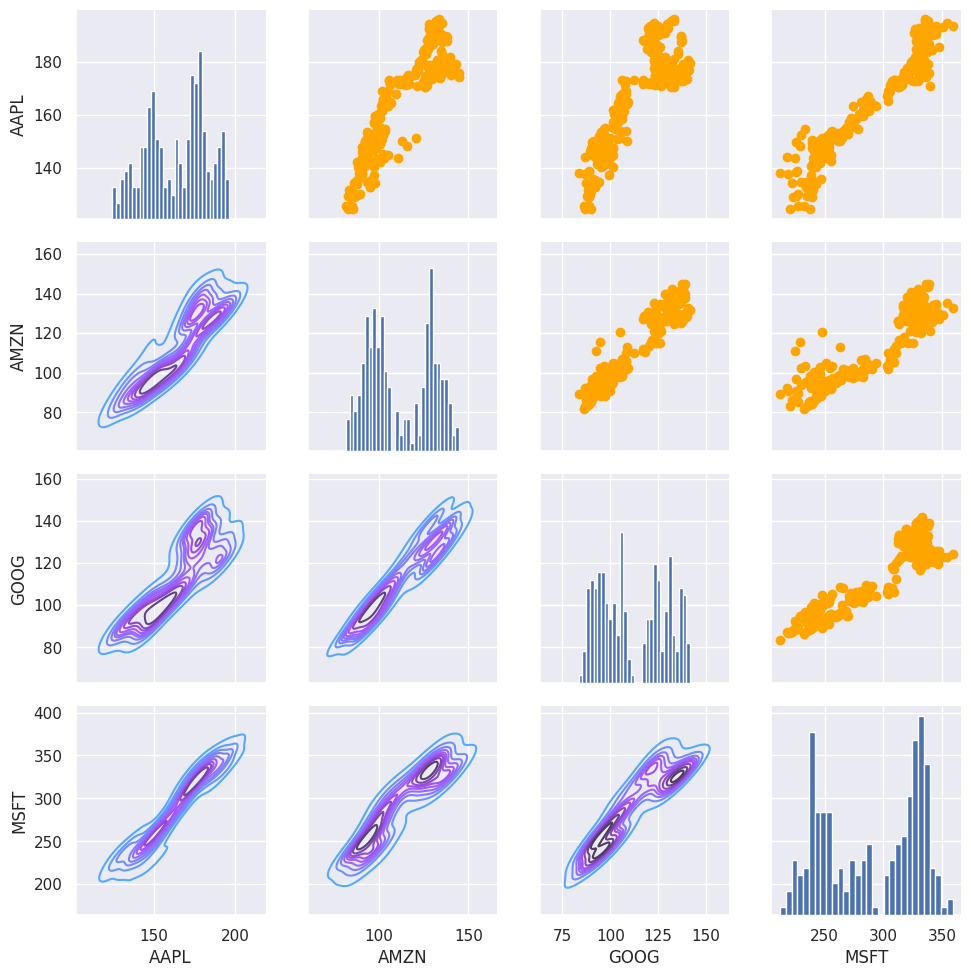

In [33]:
return_fig = sns.PairGrid(closing_df)
return_fig.map_upper(plt.scatter, color = 'orange')
return_fig.map_lower(sns.kdeplot, cmap = 'cool_d')
return_fig.map_diag(plt.hist, bins = 30)

Text(0.5, 1.0, 'Correlation Of Stock Price')

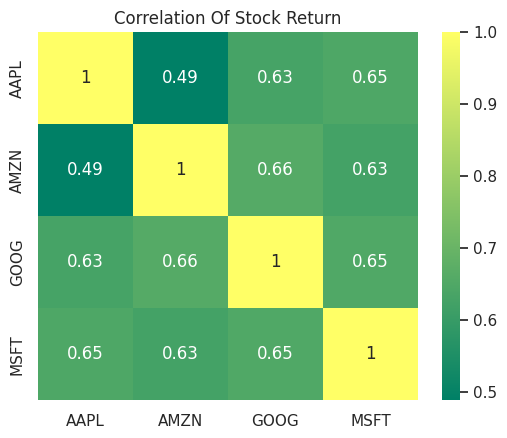

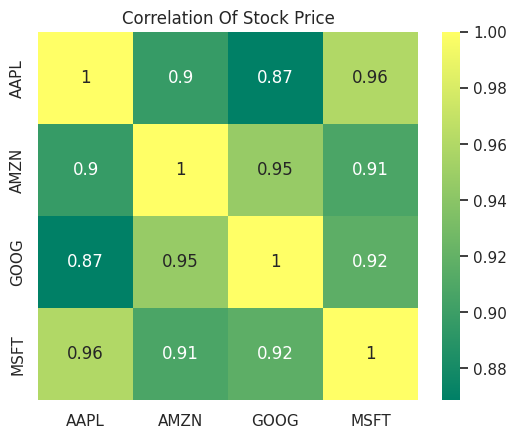

In [34]:
plt.figure(figsize= (12, 10))
plt.subplot(2,2,1)
sns.heatmap(tech_rets.corr(), annot = True, cmap = 'summer')
plt.title('Correlation Of Stock Return')

plt.figure(figsize= (12, 10))
plt.subplot(2,2,2)
sns.heatmap(closing_df.corr(), annot = True, cmap = 'summer')
plt.title('Correlation Of Stock Price')

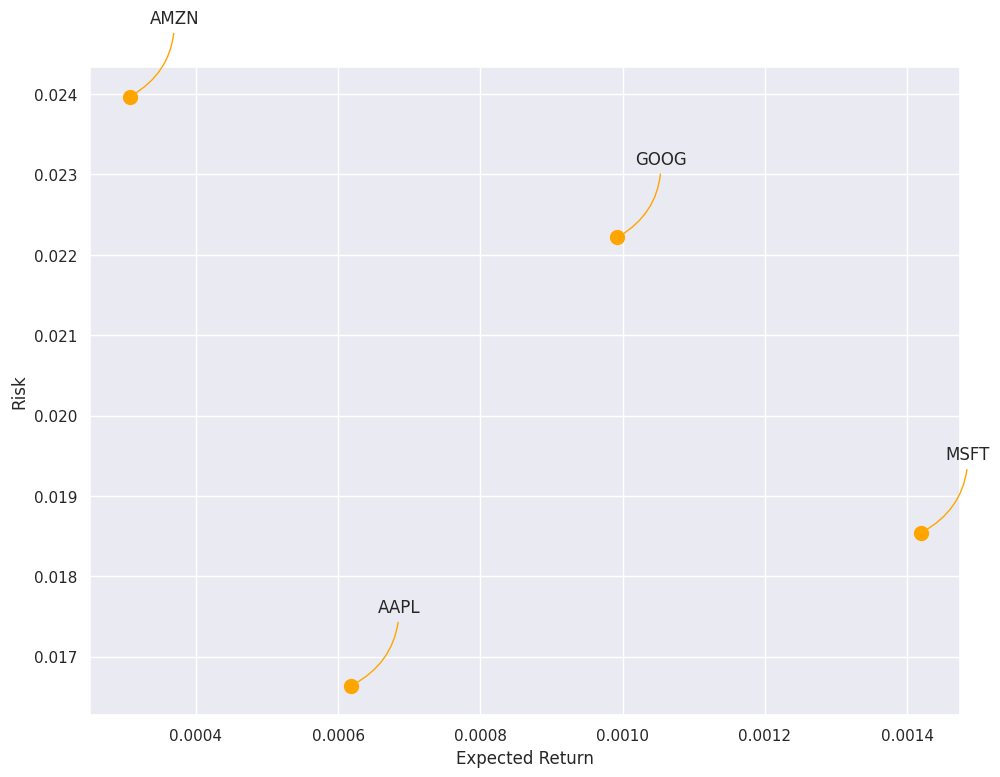

In [35]:
rets = tech_rets.dropna()
plt.figure(figsize = (10, 8))
plt.scatter(rets.mean(), rets.std(), s = 100, color = 'orange')
plt.xlabel('Expected Return')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y), xytext = (50, 50), textcoords = 'offset points',
                 ha ='right', va = 'bottom', arrowprops = dict(arrowstyle = '-', color = 'orange'
                                                               , connectionstyle = 'arc3,rad=-0.3'))

## Predicting Stock Price Of Apple

In [36]:
apple_df = pdr.get_data_yahoo('AAPL', start = '2012-01-01', end = datetime.now())
apple_df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466094,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533086,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672227,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804705,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784392,394024400
...,...,...,...,...,...,...
2023-10-19,176.039993,177.839996,175.190002,175.460007,175.460007,59302900
2023-10-20,175.309998,175.419998,172.639999,172.880005,172.880005,64189300
2023-10-23,170.910004,174.009995,169.929993,173.000000,173.000000,55980100


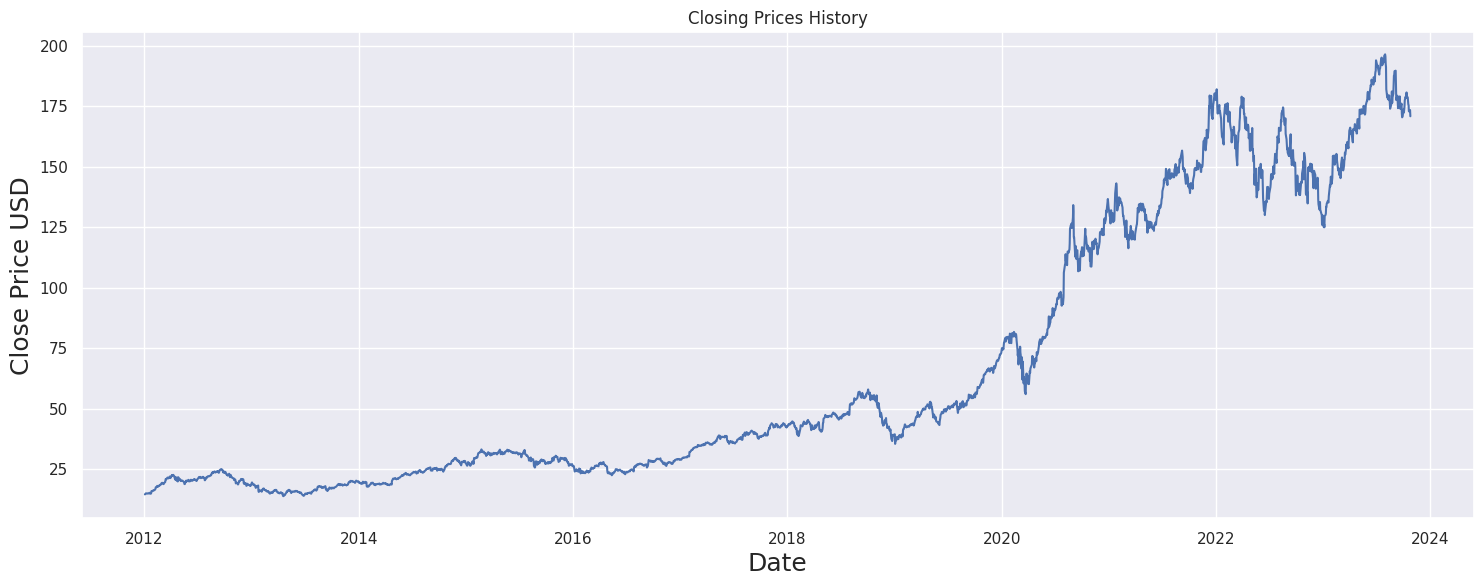

In [37]:
plt.figure(figsize=(16,6))
plt.title('Closing Prices History')
plt.plot(apple_df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

In [38]:
data = apple_df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset)*0.95))
training_data_len

2825

In [39]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.87150862],
       [0.87391956],
       [0.85983752]])

In [40]:
train_data = scaled_data[:int(training_data_len), :]
train_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.78838648],
       [0.79441375],
       [0.80164657]])

In [41]:
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00582575, 0.00721712, 0.00584728,
       0.01098419, 0.01058694, 0.01110552, 0.01222684, 0.01290588,
       0.01284914, 0.01263975, 0.0135321 , 0.01437162, 0.01532269,
       0.01685887, 0.02008583, 0.02013475, 0.02193121, 0.02327365,
       0.02096645, 0.02185489, 0.02183728, 0.02432844, 0.02397423,
       0.02462979, 0.02580786, 0.02646344, 0.02835186, 0.02972757,
       0.03012483, 0.03026377, 0.02791156, 0.02734404, 0.0274282 ,
       0.02963952, 0.03026182, 0.0315984 , 0.03474903, 0.0389525 ,
       0.03816582, 0.03816777, 0.04120687, 0.04215794, 0.04148084,
       0.04086246, 0.04021863, 0.04235754, 0.04382523, 0.04443971])]
[0.04292113229660477]
[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.005

In [42]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2765, 60, 1)

In [43]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [44]:
model = Sequential()
model.add(LSTM(128, return_sequences= True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

2765/2765 [==============================] - 144s 51ms/step - loss: 0.0013


In [47]:
# Create testing data
test_set = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_set)):
  x_test.append(test_set[i-60:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean((predictions - y_test) ** 2))

rmse

5/5 [==============================] - 0s 33ms/step


3.444645547301149

<ipython-input-51-a4dce29ba10f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


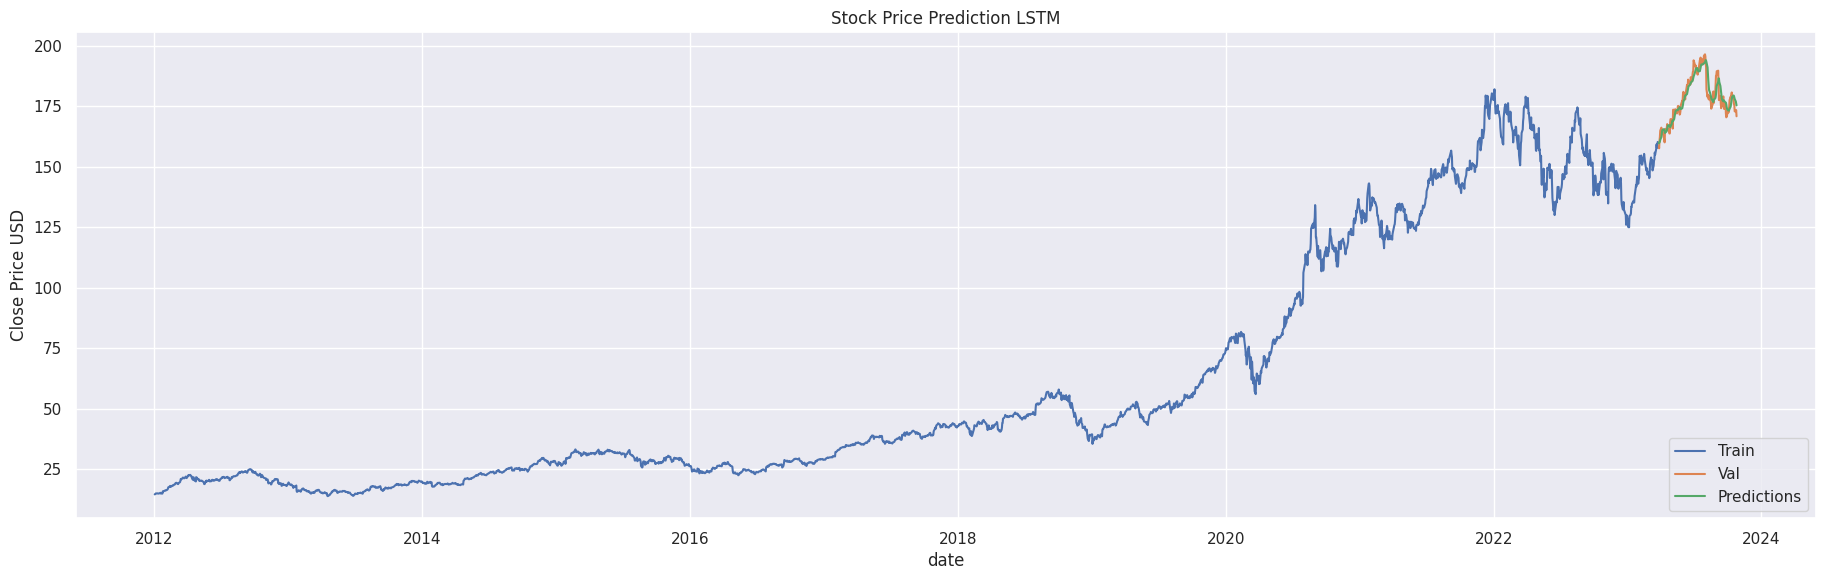

In [51]:
# Visualize prediction data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize = (20,6))
plt.title('Stock Price Prediction LSTM')
plt.xlabel('date')
plt.ylabel('Close Price USD')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [ ]:
# Reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm